In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
#Data collection and processing
#loading the csv data to a pandas DataFrame
gold_data = pd.read_csv("C:/Users/Junaid/Desktop/gld_price_data.csv")

In [7]:
#printing first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# Total number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
#getting some basic information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# Now we will find correlation between various columns of the dataset
# Correlation are of two types - postive and negative
correlation = gold_data.corr()

<AxesSubplot:>

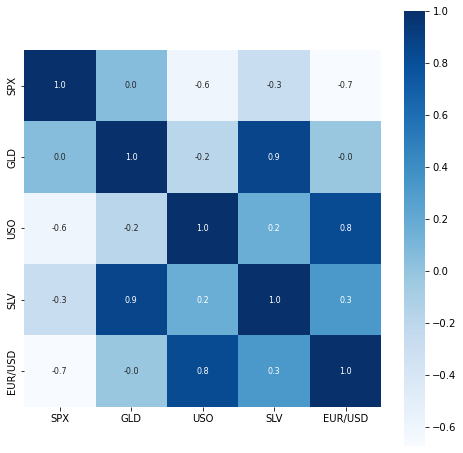

In [13]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar =True, square = True, fmt = '.1f', annot= True, annot_kws= {'size':8}, cmap = 'Blues')

In [14]:
# Correlation values of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Junaid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

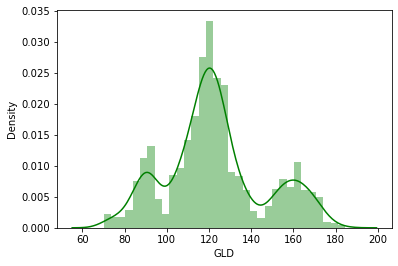

In [15]:
#Checking the distribution of the gold price
sns.distplot(gold_data['GLD'], color ='green')

In [20]:
#Splitting the features and target
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [22]:
# Splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [23]:
#Model training - Random Forest Regressor
regressor = RandomForestRegressor(n_estimators =100)

In [24]:
#Training the model 
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [25]:
#Model evaluation
#Prediction on test data
test_data_prediction = regressor.predict(X_test) 

In [26]:
print(test_data_prediction)

[168.19109927  82.07239986 116.2041003  127.63980076 120.92090086
 154.62139691 150.33429881 126.13350029 117.52599857 126.11290045
 116.72760088 172.0973007  141.90209903 167.94229909 115.29220015
 117.63410063 139.55960345 170.01580055 158.62730322 160.89169975
 155.00540015 125.11280038 176.64799947 156.66230242 125.21520038
  93.62339966  77.22680019 120.81110001 119.10199957 167.47489993
  88.24560053 125.31830017  91.26390073 117.70270037 121.10969922
 136.18060062 115.47660109 115.38100078 148.60929945 107.35110081
 103.78500233  87.05049775 126.54360047 117.77399987 153.06139894
 119.57199999 108.27270016 107.99389831  93.23850054 127.11599747
  74.77610038 113.66449973 121.42640016 111.17519878 118.80029857
 120.75989944 159.97550087 167.15920137 147.07139675  85.70229869
  94.33200004  86.73969903  90.65989996 119.11540057 126.5414006
 127.68880031 170.46619991 122.20209939 117.41749899  98.61380035
 168.50190012 143.05799821 132.00510216 121.20960206 121.02559974
 119.564600

In [27]:
#testing the predicted values against actual values
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R sqaured error: ", error_score)

R sqaured error:  0.9890707437496585


In [28]:
#Another way to check the accuracy of the prediction (in case the data range is less)
# It can be done by plotting some graphs like given below
# Converting the gold values into a list
Y_test = list(Y_test)

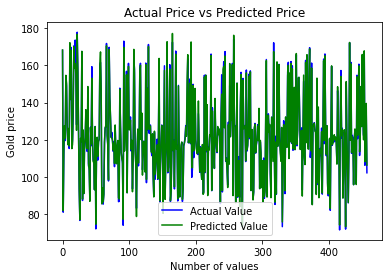

In [29]:
plt.plot(Y_test, color = 'Blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'Green', label ='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()